# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras
# print(datetime.datetime.now())

Using TensorFlow backend.


In [2]:
import numpy as np
import datetime

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist
print(datetime.datetime.now())

2019-09-07 12:32:11.451370


### Load pre-shuffled MNIST data into train and test sets

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(datetime.datetime.now())

11493376/11490434 [==============================] - 2s 0us/step
2019-09-07 12:32:15.010420


(60000, 28, 28)
2019-09-07 12:32:15.038783


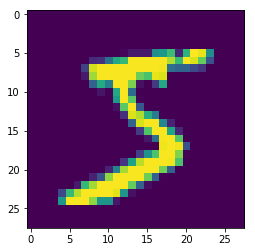

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])
print(datetime.datetime.now())

In [5]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
print(datetime.datetime.now())

2019-09-07 12:32:15.199379


In [6]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(datetime.datetime.now())

2019-09-07 12:32:15.304574


In [7]:
y_train[:10]
print(datetime.datetime.now())

2019-09-07 12:32:15.314020


In [8]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print(datetime.datetime.now())

2019-09-07 12:32:15.325099


In [9]:
Y_train[:10]
print(datetime.datetime.now())

2019-09-07 12:32:15.331451


x1 = Input

x2 = Conv(x1)

x3 = Conv(x1 + x2)

x4 = MaxPooling(x1 + x2 + x3)

x5 = Conv(x4)

x6 = Conv(x4 + x5)

x7 = Conv(x4 + x5 + x6)

x8 = MaxPooling(x5 + x6 + x7)

x9 = Conv(x8)

x10 = Conv (x8 + x9)

x11 = Conv (x8 + x9 + x10)

BIG KERNEL Operation (use a large kernel size (10 units), if required at this step to be able to add softmax in the next layer)

SoftMax

In [11]:
## MAIN BLOCK
from keras.models import Model
from keras.layers import Activation
from keras.layers import Input, Dense, add, Add,  concatenate, Concatenate, Lambda
from keras.layers import Activation, Flatten, Dense, Dropout, concatenate
from keras.layers.normalization import BatchNormalization

x1 = Input(shape=(28, 28, 1))
###########
x2 = Convolution2D(32, (3, 3), activation='relu', padding='same')(x1) # 28
x2 = BatchNormalization()(x2)
x2 = Dropout(0.10)(x2)
x2 = Convolution2D(10, (1, 1), activation='relu', padding='same')(x2) # 28
x2 = BatchNormalization()(x2)
x2 = Dropout(0.10)(x2)

x1_x2 = add([x1, x2])
x3 = Convolution2D(10, (3, 3), activation='relu', padding='same')(x1_x2) # 28
x3 = BatchNormalization()(x3)
x3 = Dropout(0.15)(x3)

x1_x2_x3 = add([x1, x2, x3])
x4 = MaxPooling2D(pool_size=(2, 2))(x1_x2_x3) #14

###########
x5 = Convolution2D(32, (3, 3), activation='relu', padding='same')(x4) # 14
x5 = BatchNormalization()(x5)
x5 = Dropout(0.15)(x5)
x5 = Convolution2D(10, (1, 1), activation='relu', padding='same')(x5) # 14
x5 = BatchNormalization()(x5)
x5 = Dropout(0.15)(x5)


x4_x5 = add([x4, x5])
x6 = Convolution2D(10, (3, 3), activation='relu', padding='same')(x4_x5) # 14
x6 = BatchNormalization()(x6)
x6 = Dropout(0.15)(x6)

x4_x5_x6 = add([x4, x5, x6])
x7 = Convolution2D(10, (3, 3), activation='relu', padding='same')(x4_x5_x6) # 14
x7 = BatchNormalization()(x7)
x7 = Dropout(0.15)(x7)

x5_x6_x7 = add([x5, x6, x7])
x8 = MaxPooling2D(pool_size=(2, 2))(x5_x6_x7) #14

###########

x9 = Convolution2D(32, (3, 3), activation='relu', padding='same')(x8) # 7
x9 = BatchNormalization()(x9)
x9 = Dropout(0.15)(x9)
x9 = Convolution2D(10, (1, 1), activation='relu', padding='same')(x9) # 7
x9 = BatchNormalization()(x9)
x9 = Dropout(0.15)(x9)

x8_x9 = add([x8, x9])
x10 = Convolution2D(10, (3, 3), activation='relu', padding='same')(x8_x9) # 7
x10 = BatchNormalization()(x10)
x10 = Dropout(0.15)(x10)


x8_x9_x10 = add([x8, x9, x10])
x11 = Convolution2D(10, (3, 3), activation='relu', padding='same')(x8_x9_x10) # 7
x11 = BatchNormalization()(x11)
x11 = Dropout(0.15)(x11)

x12 = Convolution2D(10, (7, 7), activation='relu')(x11) # 10


########################################
x13 = Flatten()(x12)
predictions = Activation('softmax')(x13)

model = Model(inputs=x1, outputs=predictions)

# model = Sequential()
# model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
# model.add(Convolution2D(10, 1, activation='relu'))
# model.add(Convolution2D(10, 26))
# model.add(Flatten())
# model.add(Activation('softmax'))

print(datetime.datetime.now())




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

2019-09-07 12:35:33.923460


In [12]:
model.summary()

print(datetime.datetime.now())

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 28, 28, 32)   320         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 28, 28, 32)   128         conv2d_2[0][0]                   
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 28, 28, 32)   0           batch_normalization_1[0][0]      
____________________________________________________________________________________________

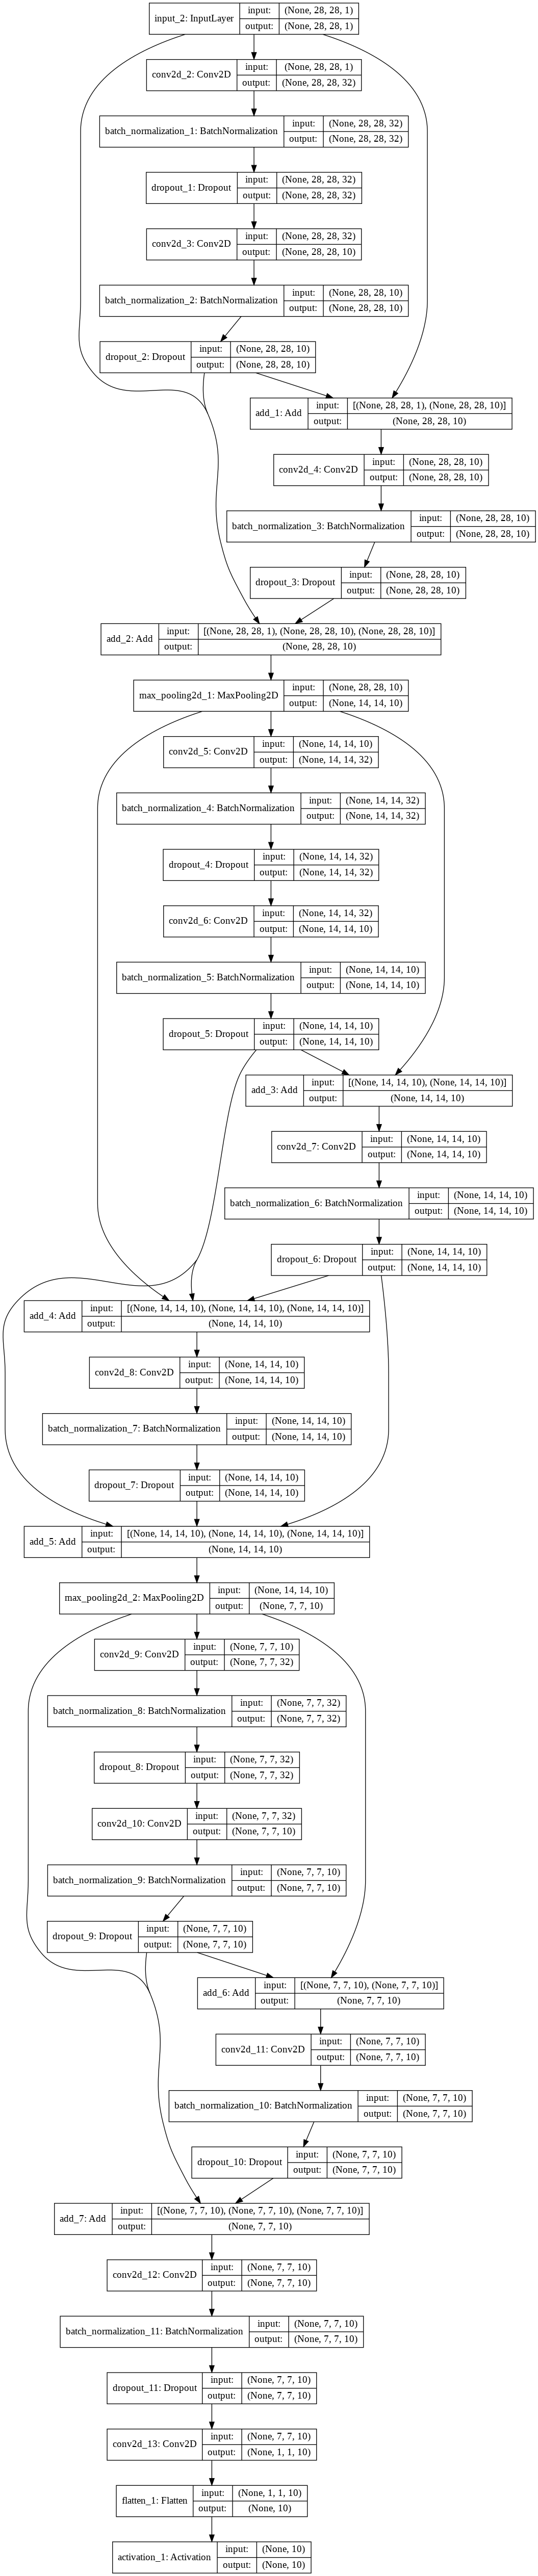

In [13]:
from keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [0]:
model.save_weights('model_quiz7_noTraining_BN_Dropout.h5')

In [15]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
print(datetime.datetime.now())


2019-09-07 12:35:57.133456


In [16]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)
print(datetime.datetime.now())

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 36s 595us/step - loss: 0.4413 - acc: 0.8467
Epoch 2/10
60000/60000 [==============================] - 31s 520us/step - loss: 0.2956 - acc: 0.8841
Epoch 3/10
60000/60000 [==============================] - 31s 519us/step - loss: 0.2794 - acc: 0.8880
Epoch 4/10
60000/60000 [==============================] - 31s 518us/step - loss: 0.2731 - acc: 0.8896
Epoch 5/10
60000/60000 [==============================] - 31s 511us/step - loss: 0.2691 - acc: 0.8906
Epoch 6/10
60000/60000 [==============================] - 31s 514us/step - loss: 0.2652 - acc: 0.8912
Epoch 7/10
60000/60000 [==============================] - 31s 511us/step - loss: 0.2615 - acc: 0.8926
Epoch 8/10
60000/60000 [==============================] - 30s 507us/step - loss: 0.2608 - acc: 0.8924
Epoch 9/10
60000/60000 [==============================] - 31s 509us/step - loss: 0.2584 - acc: 0.8928
Epoch 10/10
60000/60000 [==============================] - 31s 511us/step - loss: 

In [17]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(datetime.datetime.now())

2019-09-07 12:41:14.258361


In [18]:
print(score)
print(datetime.datetime.now())

[0.2588391992405959, 0.8929]
2019-09-07 12:41:14.265305


In [0]:
model.save_weights('model_quiz7_afterTraining_BN_Dropout.h5')

## So our Model is getting validation accuracy of 89.29%